In [177]:
import numpy as np

In [196]:
path = "data/test 2022-07-08 14:53:27.557856.csv"
headers = np.loadtxt(path, delimiter=",", dtype="str", max_rows=1)
data = np.loadtxt(path, delimiter=",", skiprows=1)

In [198]:
size = len(data) // 2
reps = 3
levels = 10
block1 = data[:size]
block2 = data[size:]
block1 = np.reshape(block1, (reps, levels, -1))
block2 = np.reshape(block2, (reps, levels, -1))

for i in range(3):
    block1[i] = block1[i][block1[i][:,1].argsort()]
    block2[i] = block2[i][block2[i][:,2].argsort()]

In [201]:
ratings1 = (block1[0,:,3] + block1[1,:,3] + block1[2,:,3]) / 3
ratings2 = (block2[0,:,3] + block2[1,:,3] + block2[2,:,3]) / 3

In [202]:
keys1 = block1[0,:,1]
keys2 = block2[0,:,2]

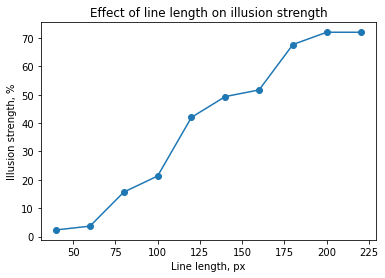

In [203]:
import matplotlib.pyplot as plt
ax = plt.subplot()
plt.scatter(keys1, ratings1)
plt.plot(keys1, ratings1)
ax.set_title("Effect of line length on illusion strength")
ax.set_xlabel("Line length, px")
ax.set_ylabel("Illusion strength, %")
plt.show()

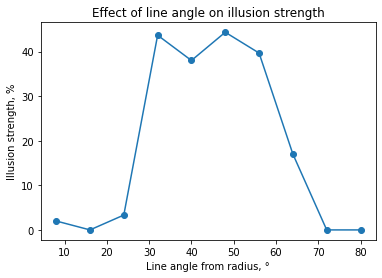

In [204]:
ax = plt.subplot()
plt.scatter(keys2, ratings2)
plt.plot(keys2, ratings2)
ax.set_title("Effect of line angle on illusion strength")
ax.set_xlabel("Line angle from radius, °")
ax.set_ylabel("Illusion strength, %")
plt.show()

#### 3D plot: using the average rating of each point defined by (line_length, line_angle)

In [205]:
datai = data.astype("int")

In [206]:
mapping = {}
for i in range(len(datai)):
    key = (datai[i,1], datai[i, 2])
    if key in mapping:
        mapping[key] += datai[i, 3]
    else:
        mapping[key] = datai[i, 3]

In [207]:
x = []
y = []
z = []
for entry in mapping.items():
    x.append(entry[0][0])
    y.append(entry[0][1])
    z.append(entry[1])
z = [i / levels for i in z]

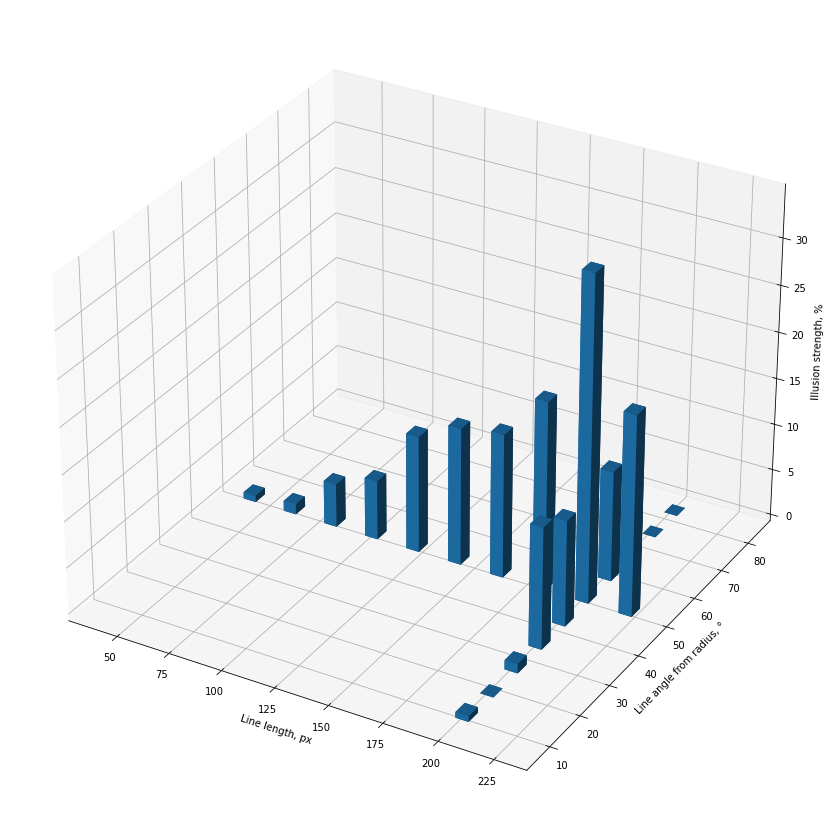

In [212]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection="3d")

bottom = np.zeros_like(z)
width = 6
depth = 3

ax.bar3d(x, y, bottom, width, depth, z)
ax.set_xlabel("Line length, px")
ax.set_ylabel("Line angle from radius, °")
ax.set_zlabel("Illusion strength, %")
plt.show()